<a href="https://colab.research.google.com/github/gimenopea/CSCI6364/blob/main/PCA%2C%20KNN%2C%20RF%20-%20Project%203/6364_Project_3_Part_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dataset Source and Notebook Reference:
https://www.kaggle.com/code/ruslankl/k-means-clustering-pca/notebook

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [ ]:
train_path = '/content/drive/MyDrive/DATA_STORE/6364Proj3/human_act_train.csv'
test_path = '/content/drive/MyDrive/DATA_STORE/6364Proj3/human_act_test.csv'

train = pd.read_csv(train_path)

# 1. K Means

### 1a. Data Preparation and EDA

In [ ]:
#get unique values in the activity column and turn into array
#save labels as string
Labels = train['activity']
Data = train.drop(['rn', 'activity'], axis = 1)
Labels_keys = Labels.unique().tolist()
Labels = np.array(Labels)

In [ ]:
#find the best k in k means using the silhouette score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#find the best k in k means
def find_best_k(X, max_k):
    best_k = 0
    best_score = 0
    for k in range(2, max_k):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
        score = silhouette_score(X, kmeans.labels_)
        if score > best_score:
            best_k = k
            best_score = score
    return best_k

best_k = find_best_k(Data, 10)
print(f'best k based on silhouette score: {best_k}')

best k based on silhouette score: 2


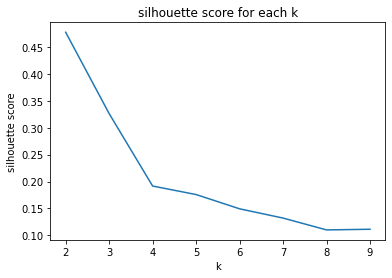

In [ ]:
#plot the silhouette score for each k
def plot_silhouette_score(X, max_k):
    scores = []
    for k in range(2, max_k):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
        score = silhouette_score(X, kmeans.labels_)
        scores.append(score)
    plt.plot(range(2, max_k), scores)
    plt.xlabel('k')
    plt.ylabel('silhouette score')
    plt.title('silhouette score for each k')
    plt.show()

plot_silhouette_score(Data, 10)

In [ ]:
#normalize the dataset
scaler = StandardScaler()
Data = scaler.fit_transform(Data)

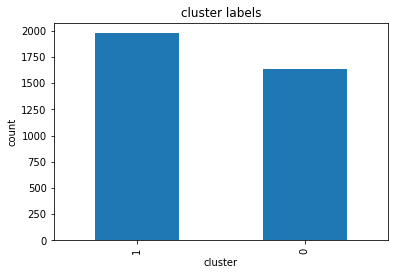

In [ ]:
#perform k means clustering using best k
kmeans = KMeans(n_clusters=best_k, random_state=0).fit(Data)

#add the cluster labels to the dataframe
Labels = pd.DataFrame(Labels)
Labels.columns = ['activity']
Labels['cluster'] = kmeans.labels_
Labels['cluster'] = Labels['cluster'].astype('category')

#plot the cluster labels
Labels['cluster'].value_counts().plot(kind='bar')
plt.title('cluster labels')
plt.xlabel('cluster')
plt.ylabel('count')
plt.show()

In [ ]:
#calculate the homogeneity score, completeness score
from sklearn.metrics import homogeneity_score, completeness_score

print(f'homogeneity score: {homogeneity_score(Labels["activity"], Labels["cluster"])}')
print(f'completeness score: {completeness_score(Labels["activity"], Labels["cluster"])}')


homogeneity score: 0.3782347751436709
completeness score: 0.9807129071960827


### Findings:
- Homogeneity: this is score that indicates how homogenous the cluster is, a perfect homogeneous cluster is one where each cluster only has class of the same labels, in the case of k=2, the score is .37
- Completeness: when a cluster is perfectly complete, all samples that belong to the same class are grouped in the same cluster, in the case of k=2, the score is .98
- the two classes makes a distinction between activities that involve moving and no moving, as seen by the completeness score, this appears to be a really result

# 2. Using Principal Component Analysis (PCA)

Principal Component Analysis is a dimension-reduction tool that can be used to reduce a large set of variables to a small set that still contains most of the information in the large set. The goal of this section is to apply PCA to the dataset to reduce the dimension of our data and apply k means to it

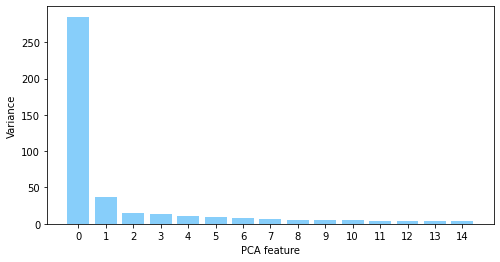

In [ ]:
#import pca
from sklearn.decomposition import PCA

pca = PCA(random_state=123)
pca.fit(Data)
features = range(pca.n_components_)

#plot the pca vs variance chart to determine how many PCA features to use
plt.figure(figsize=(8,4))
plt.bar(features[:15], pca.explained_variance_[:15], color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:15])
plt.show()

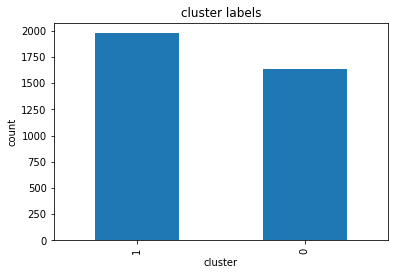

In [ ]:
#perform k means on reduced dataset using pca
pca = PCA(n_components=2, random_state=123)
pca.fit(Data)
Data_pca = pca.transform(Data)


#perform k means again with best k
kmeans = KMeans(n_clusters=best_k, random_state=0).fit(Data_pca)

#add the cluster labels to the dataframe
Labels['cluster_pca'] = kmeans.labels_
Labels['cluster_pca'] = Labels['cluster_pca'].astype('category')

#plot the cluster labels
Labels['cluster_pca'].value_counts().plot(kind='bar')
plt.title('cluster labels')
plt.xlabel('cluster')
plt.ylabel('count')
plt.show()

In [ ]:
#run the analysis once again with the reduced dataset
print(f'homogeneity score: {homogeneity_score(Labels["activity"], Labels["cluster_pca"])}')
print(f'completeness score: {completeness_score(Labels["activity"], Labels["cluster_pca"])}')

homogeneity score: 0.3773122039443527
completeness score: 0.9782459755675554


# Findings after PCA
- homogeneity score and completeness score did not appear to change much by using pca
- adding in the additional PCA, provided the benefit of dimensionality reduction for the same result in this particular dataset